# Proyecto integrador 1
## Proyecto de analisis de imagenes
## Integrantes:

   - Juliana Ochoa Ramirez
   - Javier Arturo Rozo Alzate
   - Mateo Graciano
   - Cristian David Muñoz Mora
   - Juan Mauricio Cuscagua López
    
## Entendimiento del problema

- **Determinar los objetivos**: Lograr un aplicativo que permita reconocer si una foto es un rostro de un humano.  Adiciodnalmente separar por el sexo y xxxx pensemos la otra distincion.

- **Evaluación de la situación**: ¿cuál es el conocimiento previo disponible acerca del problema?, ¿se cuenta con la cantidad de datos requerida para resolver el problema?, ¿cuál es la relación coste beneficio de la aplicación de DM?

- **Que solución pretende dar el proyecto**

## Entendimiento de los datos

explicar maso como es la forma en la que los vamos a almacenar y que son en escala de grises y todos eso

identificar su calidad y establecer las relaciones más evidentes que permitan definir las primeras hipótesis

- **Recolección de datos iniciales**: Esta tarea tiene como objetivo, elaborar informes con una lista de los datos adquiridos, su localización, las técnicas utilizadas en su recolección y los problemas y soluciones inherentes a este proceso

- **Descripción de los datos**:(número de registros y campos por registro), su identificación, el significado de cada campo y la descripción del formato inicial.

- **Exploración de datos**:  La salida de esta tarea es un informe de exploración de los datos, aplicación de pruebas estadísticas básicas, que revelen propiedades de los datos adquiridos.

- **Verificación de la calidad de los datos**: La idea en este punto, es asegurar la completitud y corrección de los datos.

## Preparacón de los datos
Selección de datos que subconjunto de los datos vamos a dejar.

- **Limpieza de los datos**:  tecnicas 'normalización de los datos, discretización de campos numéricos, tratamiento de valores ausentes, reducción del volumen de datos, etc

- **Estructuración de los datos**: Esta tarea incluye las operaciones de preparación de los datos tales como la generación de nuevos atributos a partir de atributos ya existentes, integración de nuevos registros o transformación de valores para atributos existentes

- **Integración de los datos**:  generación de nuevos campos a partir de otros existentes, creación de nuevos registros, fusión de tablas campos o nuevas tablas donde se resumen características de múltiples registros o de otros campos en nuevas tablas de resumen.

- **Formateo de los datos**: reordenación de los campos y/o registros de la tabla o el ajuste de los valores de los campos a las limitaciones de las herramientas de modelación. Cambio de 180,200 a 10, 180.

Creo que estas cosas de arriba se debenintegrar a los chunks de abajo - comparto y podemos empezar a completar con lo que hemos hecho pero debemos pensar mas en el proyecto final y en que hariamos.


## Librerias usadas en el proyecto

In [1]:
import cv2
import re
import pandas as pd
import numpy as np
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance


# Lectura y preprocesamiento de datos

In [2]:
#List all image files
import glob
image_list = []
base1='../input/faces94/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)
            if('/male/'in root3):
                male.append(n_im)
            if('/female/'in root3):
                female.append(n_im)
            if('/malestaff/'in root3):
                male.append(n_im)
            n_im+=1

# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

    

# Exploración de datos

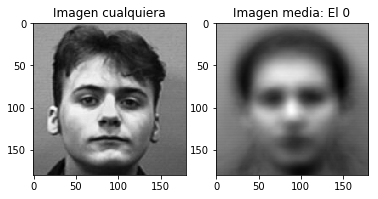

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[2500,:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen cualquiera')
#plt.show()

mean_face=np.mean(data_set, axis=0)
axs[1].imshow(mean_face ,cmap = plt.cm.gray) #check
axs[1].set_title('Imagen media: El 0')
plt.show()




# Distancias sobre imagenes
## Hausserdoff distance

### Distribución de las normas

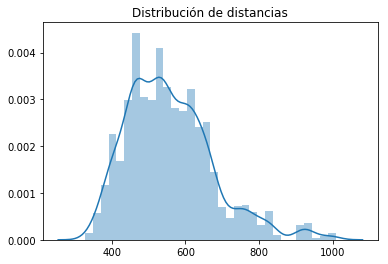

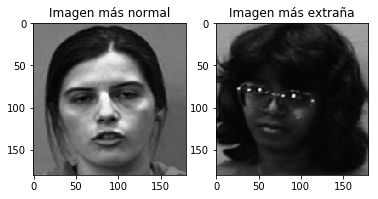

In [4]:
cero=np.mean(data_set, axis=0)
distances=[]
for image in range(data_set.shape[0]):
    #print(image)
    distances.append(directed_hausdorff(cero,data_set[image,:,:])[0])

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

### Se identifican los outliers?

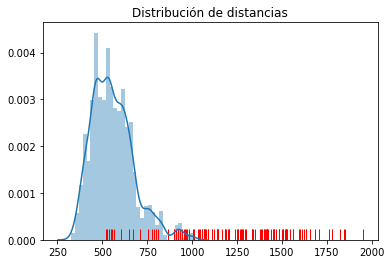

In [5]:
outlier_list = []
base1='../input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

distances_out=[]
for image in range(data_set_out.shape[0]):
    #print(image)
    distances_out.append(directed_hausdorff(cero,data_set_out[image,:,:])[0])

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()

##  Distancia asociada a norma Frobenius

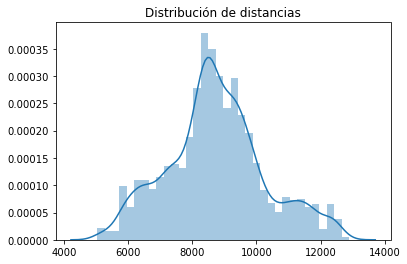

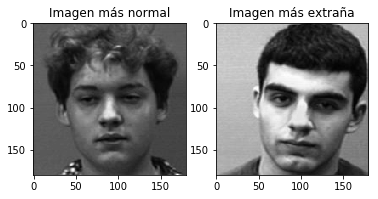

In [6]:

cero=np.mean(data_set, axis=0)
distances=[]
for image in range(data_set.shape[0]):
    d=np.linalg.norm(np.abs(cero- data_set[image,:,:]))
    distances.append(d)

sns.distplot(distances)
plt.title('Distribución de distancias')
plt.show()

orden=np.argsort(np.array(distances))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(data_set[orden[0],:,:], cmap = plt.cm.gray) #check
axs[0].set_title('Imagen más normal')
#plt.show()

axs[1].imshow(data_set[orden[-1],:,:], cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más extraña')
plt.show()

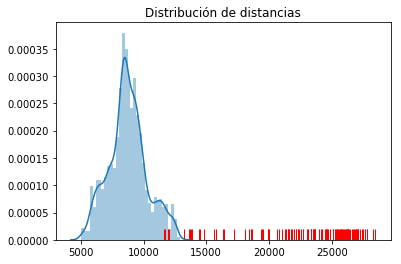

In [7]:
outlier_list = []
base1='../input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)

distances_out=[]
for image in range(data_set_out.shape[0]):
    d=np.linalg.norm(np.abs(cero- data_set_out[image,:,:]))
    distances_out.append(d)

sns.distplot(distances)
sns.rugplot(distances_out,color="r")
plt.title('Distribución de distancias')
plt.show()